In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('train_.csv')
test_data = pd.read_csv('test_.csv')
val_data = pd.read_csv('validation_.csv')

In [3]:
train_data = train_data.loc[:, ~train_data.columns.str.contains('^Unnamed')]
test_data = test_data.loc[:, ~test_data.columns.str.contains('^Unnamed')]
val_data = val_data.loc[:, ~val_data.columns.str.contains('^Unnamed')]

In [4]:
print(train_data.Transported.value_counts())
print(test_data.Transported.value_counts())
print(val_data.Transported.value_counts())

True     3154
False    3104
Name: Transported, dtype: int64
True     871
False    868
Name: Transported, dtype: int64
True     353
False    343
Name: Transported, dtype: int64


In [5]:
print(f'Dimensions of training data is {train_data.shape}')
print(f'Dimesions of the test data is {test_data.shape}')
print(f'Dimesions of the validation data is {val_data.shape}')

Dimensions of training data is (6258, 14)
Dimesions of the test data is (1739, 14)
Dimesions of the validation data is (696, 14)


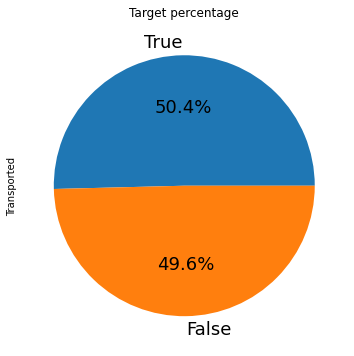

In [6]:
plt.figure(figsize=(6,6))
train_data['Transported'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':18}).set_title("Target percentage")
plt.show()

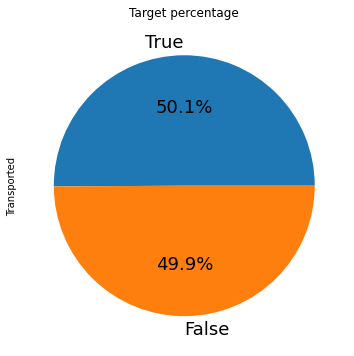

In [7]:
plt.figure(figsize=(6,6))
test_data['Transported'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':18}).set_title("Target percentage")
plt.show()

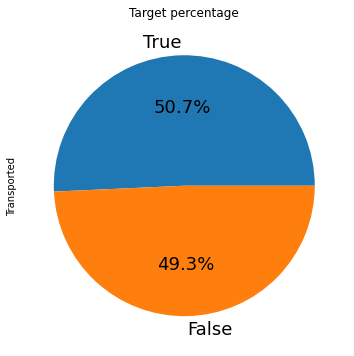

In [8]:
plt.figure(figsize=(6,6))
val_data['Transported'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':18}).set_title("Target percentage")
plt.show()

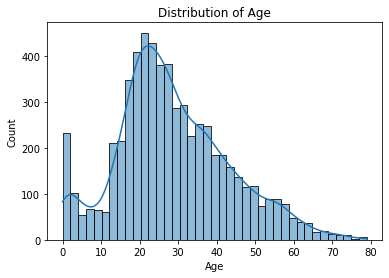

In [9]:
sns.histplot(data=train_data, x="Age", kde=True)
plt.title('Distribution of Age')
plt.show()


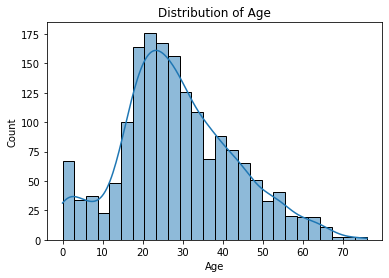

In [10]:
sns.histplot(data=test_data, x="Age", kde=True)
plt.title('Distribution of Age')
plt.show()


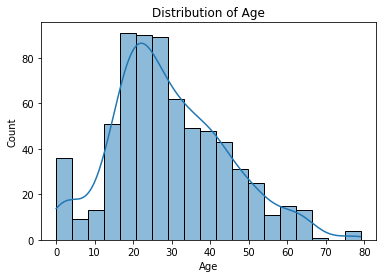

In [11]:
sns.histplot(data=val_data, x="Age", kde=True)
plt.title('Distribution of Age')
plt.show()


In [12]:
import pandas as pd
import plotly.express as px

fig = px.scatter(train_data, x='Age', y='VIP', color='Transported')
fig.update_layout(title='Age vs. VIP')
fig.show()


In [13]:
fig = px.scatter(test_data, x='Age', y='VIP', color='Transported')
fig.update_layout(title='Age vs. VIP')
fig.show()

In [14]:
fig = px.scatter(val_data, x='Age', y='VIP', color='Transported')
fig.update_layout(title='Age vs. VIP')
fig.show()

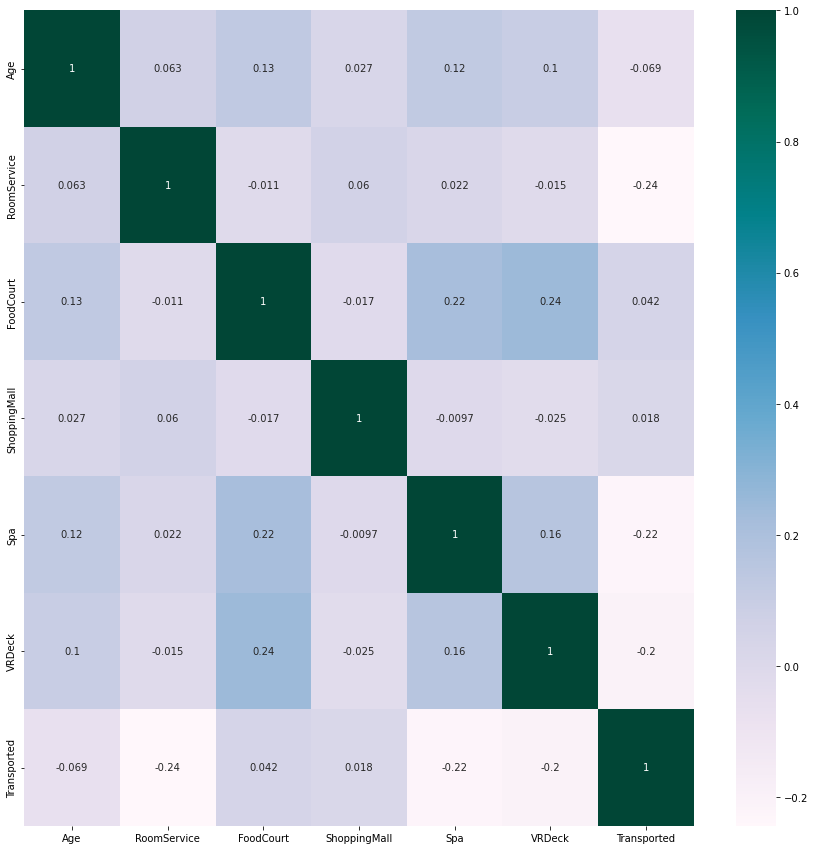

In [15]:
corr_matrix = train_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="PuBuGn", ax=ax)

plt.show()

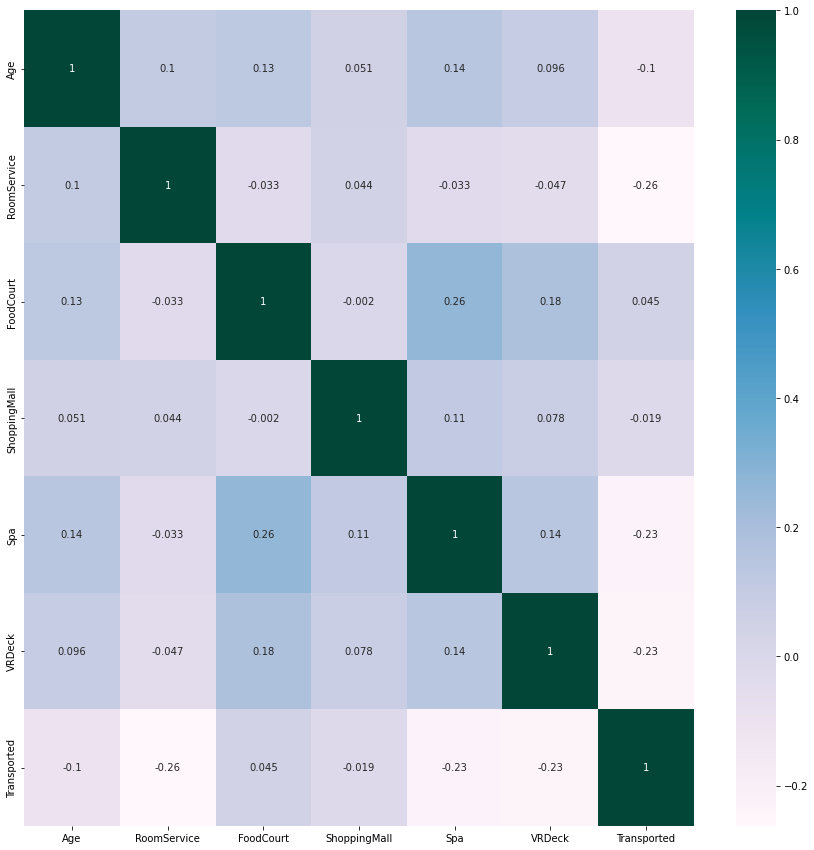

In [16]:
corr_matrix = test_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="PuBuGn", ax=ax)

plt.show()

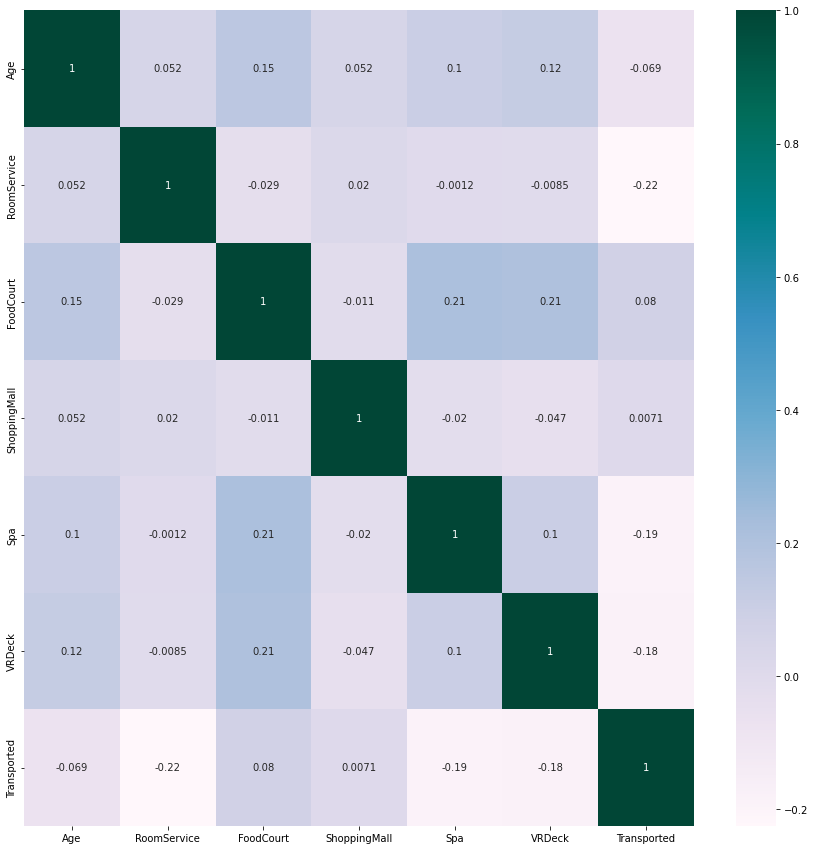

In [17]:
corr_matrix = val_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="PuBuGn", ax=ax)

plt.show()

In [18]:
# Split 'PassengerId' column in the train set
train_data[['GroupNumber', 'FamilySize']] = train_data['PassengerId'].apply(lambda x: pd.Series(str(x).split("_")))

# Split 'Cabin' column in the train set
train_data[['Deck', 'Cabin_num', 'Side']] = train_data['Cabin'].apply(lambda x: pd.Series(str(x).split("/")))

# Split 'Cabin' column in the validation set
val_data[['Deck', 'Cabin_num', 'Side']] = val_data['Cabin'].apply(lambda x: pd.Series(str(x).split("/")))

# Split 'PassengerId' column in the validation set
val_data[['GroupNumber', 'FamilySize']] = val_data['PassengerId'].apply(lambda x: pd.Series(str(x).split("_")))

# Split 'PassengerId' column in the test set
test_data[['GroupNumber', 'FamilySize']] = test_data['PassengerId'].apply(lambda x: pd.Series(str(x).split("_")))

# Split 'Cabin' column in the test set
test_data[['Deck', 'Cabin_num', 'Side']] = test_data['Cabin'].apply(lambda x: pd.Series(str(x).split("/")))

In [19]:
# Compute 'FamilySize' in the train set
train_data['FamilySize'] = train_data.groupby('GroupNumber')['GroupNumber'].transform('count')

# Compute 'FamilySize' in the test set
test_data['FamilySize'] = test_data.groupby('GroupNumber')['GroupNumber'].transform('count')

# Compute 'FamilySize' in the val set
val_data['FamilySize'] = val_data.groupby('GroupNumber')['GroupNumber'].transform('count')


In [20]:
train_data['FamilyType'] = np.where(train_data['FamilySize'] == 1, 'Single', np.where(train_data['FamilySize'] <= 4, 'Small', 'Large'))
test_data['FamilyType'] = np.where(test_data['FamilySize'] == 1, 'Single', np.where(test_data['FamilySize'] <= 4, 'Small', 'Large'))
val_data['FamilyType'] = np.where(val_data['FamilySize'] == 1, 'Single', np.where(val_data['FamilySize'] <= 4, 'Small', 'Large'))

In [21]:
train_data = train_data.drop(['Name', 'PassengerId', 'Cabin'], axis = 1)
test_data = test_data.drop(['Name', 'PassengerId', 'Cabin'], axis = 1)
val_data = val_data.drop(['Name', 'PassengerId', 'Cabin'], axis = 1)

In [22]:
from sklearn.impute import SimpleImputer

# Define the columns to impute
col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num', 'CryoSleep', 'VIP']

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the train_data
train_data[col] = imputer.fit_transform(train_data[col])

# Impute missing values in the test_data
test_data[col] = imputer.transform(test_data[col])

# Impute missing values in the val_data
val_data[col] = imputer.transform(val_data[col])

In [23]:
# Replacing the missing categorical values for train data
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].value_counts().index[0])
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].value_counts().index[0])
train_data['Deck'] = train_data['Deck'].fillna(train_data['Deck'].value_counts().index[0])
train_data['Side'] = train_data['Side'].fillna(train_data['Side'].value_counts().index[0])

In [24]:
# Replacing the missing categorical values for val data
val_data['Destination'] = val_data['Destination'].fillna(val_data['Destination'].value_counts().index[0])
val_data['HomePlanet'] = val_data['HomePlanet'].fillna(val_data['HomePlanet'].value_counts().index[0])
val_data['Deck'] = val_data['Deck'].fillna(val_data['Deck'].value_counts().index[0])
val_data['Side'] = val_data['Side'].fillna(val_data['Side'].value_counts().index[0])

In [25]:
# Replacing the missing categorical values for test data
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].value_counts().index[0])
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].value_counts().index[0])
test_data['Deck'] = test_data['Deck'].fillna(test_data['Deck'].value_counts().index[0])
test_data['Side'] = test_data['Side'].fillna(test_data['Side'].value_counts().index[0])

In [26]:
#Converting the Dataframes into a numerical values for train and test data
train_data['FamilySize'] = pd.to_numeric(train_data['FamilySize'], downcast='integer')
train_data['GroupNumber'] = pd.to_numeric(train_data['GroupNumber'], downcast='integer')

test_data['FamilySize'] = pd.to_numeric(test_data['FamilySize'], downcast='integer')
test_data['GroupNumber'] = pd.to_numeric(test_data['GroupNumber'], downcast='integer')

val_data['FamilySize'] = pd.to_numeric(val_data['FamilySize'], downcast='integer')
val_data['GroupNumber'] = pd.to_numeric(val_data['GroupNumber'], downcast='integer')

In [27]:
labels = train_data.columns
for col in labels:
    if train_data[col].dtype == 'O':
        encoder = LabelEncoder()
        train_data[col] = encoder.fit_transform(train_data[col])
        
    elif train_data[col].dtype == 'bool':
        train_data[col] = train_data[col].astype('int')

In [28]:
labels1 = test_data.columns
for col in labels1:
    if test_data[col].dtype == 'O':
        encoder = LabelEncoder()
        test_data[col] = encoder.fit_transform(test_data[col])
        
    elif test_data[col].dtype == 'bool':
        test_data[col] = test_data[col].astype('int')

In [29]:
labels2 = val_data.columns
for col in labels2:
    if val_data[col].dtype == 'O':
        encoder = LabelEncoder()
        val_data[col] = encoder.fit_transform(val_data[col])
        
    elif val_data[col].dtype == 'bool':
        val_data[col] = val_data[col].astype('int')

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns in train_data
categorical_cols_train = train_data.select_dtypes(include=['object', 'bool']).columns
train_data[categorical_cols_train] = train_data[categorical_cols_train].apply(lambda x: LabelEncoder().fit_transform(x))

# Encode categorical columns in test_data
categorical_cols_test = test_data.select_dtypes(include=['object', 'bool']).columns
test_data[categorical_cols_test] = test_data[categorical_cols_test].apply(lambda x: LabelEncoder().fit_transform(x))

# Encode categorical columns in test_data
categorical_cols_val = val_data.select_dtypes(include=['object', 'bool']).columns
val_data[categorical_cols_val] = val_data[categorical_cols_val].apply(lambda x: LabelEncoder().fit_transform(x))

# Convert boolean columns to integers
bool_cols = train_data.select_dtypes(include='bool').columns
train_data[bool_cols] = train_data[bool_cols].astype(int)
test_data[bool_cols] = test_data[bool_cols].astype(int)
val_data[bool_cols] = val_data[bool_cols].astype(int)

In [31]:
df = train_data.drop('Transported', axis = 1)
target = train_data[['Transported']]

df_val = val_data.drop('Transported',axis = 1)
target_val = val_data[['Transported']]

df_test = test_data.drop('Transported',axis = 1)
target_test = test_data[['Transported']]

In [32]:
def normalizeFeatures(X):
    mu=np.mean(X)
    sigma=np.std(X)
    X_norm=(X - mu)/sigma
    return X_norm

norm_dataset = normalizeFeatures(df)
norm_test = normalizeFeatures(df_test)
norm_dataset_val = normalizeFeatures(df_val)

In [33]:
x_train = norm_dataset.copy() 
x_test = norm_test.copy()
x_val = norm_dataset_val.copy()
y_train = target.copy()
y_test = target_test.copy()
y_val = target_val.copy()

In [34]:
train_score = []
test_score = []
val_score = []

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_val = scaler.transform(x_val)

# Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1.0, 10, 100]
}

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)
lr_y_val_pred = lr_grid_search.predict(X_val)
lr_y_pred = lr_grid_search.predict(X_test)
lr_accuracy_test = accuracy_score(y_test, lr_y_pred)
lr_accuracy_val = accuracy_score(y_val, lr_y_val_pred)
lr_accuracy_train = lr_grid_search.best_score_
lr_best_params = lr_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:")
print(lr_best_params)



# Neural Network
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_grid_search = GridSearchCV(nn_model, nn_param_grid, cv=5, scoring='accuracy')
nn_grid_search.fit(X_train, y_train)
nn_y_val_pred = nn_grid_search.predict(X_val)
nn_accuracy_val = accuracy_score(y_val, nn_y_val_pred)
nn_y_pred = nn_grid_search.predict(X_test)
nn_accuracy_test = accuracy_score(y_test, nn_y_pred)
nn_accuracy_train = nn_grid_search.best_score_
nn_best_params = nn_grid_search.best_params_
print("Best Hyperparameters for Neural Network:")
print(nn_best_params)


# Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_y_val_pred = lda_model.predict(X_val)
lda_accuracy_val = accuracy_score(y_val, lda_y_val_pred)
lda_y_pred = lda_model.predict(X_test)
lda_accuracy_test = accuracy_score(y_test, lda_y_pred)
lda_accuracy_train = lda_model.score(X_train, y_train)
lda_best_params = {}

# Results
results = {
    'Logistic Regression': {
        'accuracy_train': lr_accuracy_train,
        'accuracy_val': lr_accuracy_val,
        'accuracy_test': lr_accuracy_test,
        'best_params': lr_best_params
    },
    'Neural Network': {
        'accuracy_train': nn_accuracy_train,
        'accuracy_val': nn_accuracy_val,
        'accuracy_test': nn_accuracy_test,
        'best_params': nn_best_params
    },
    'Linear Discriminant Analysis': {
        'accuracy_train': lda_accuracy_train,
        'accuracy_val': lda_accuracy_val,
        'accuracy_test': lda_accuracy_test,
        'best_params': lda_best_params
    }
}

# Plot training accuracy
fig_train = go.Figure()
for algorithm, result in results.items():
    fig_train.add_trace(go.Bar(x=[algorithm], y=[result['accuracy_train']],
                              name='Training Accuracy'))

fig_train.update_layout(
    title='Parametric Models - Training Accuracy',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy'
)

fig_train.show()

# Plot validation accuracy
fig_val = go.Figure()
for algorithm, result in results.items():
    fig_val.add_trace(go.Bar(x=[algorithm], y=[result['accuracy_val']],
                              name='Validation Accuracy'))

fig_val.update_layout(
    title='Parametric Models - Validation Accuracy',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy'
)

fig_val.show()

# Plot testing accuracy
fig_test = go.Figure()
for algorithm, result in results.items():
    fig_test.add_trace(go.Bar(x=[algorithm], y=[result['accuracy_test']],
                             name='Testing Accuracy'))

fig_test.update_layout(
    title='Parametric Models - Testing Accuracy',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy'
)

fig_test.show()

Best Hyperparameters for Logistic Regression:
{'C': 100}
Best Hyperparameters for Neural Network:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_val = scaler.transform(x_val)

# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
rf_y_val_pred = rf_grid_search.predict(X_val)
rf_accuracy_val = accuracy_score(y_val, rf_y_val_pred)
rf_y_pred = rf_grid_search.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, rf_y_pred)
rf_accuracy_train = rf_grid_search.best_score_
rf_best_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:")
print(rf_best_params)


# Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)
gb_y_val_pred = gb_grid_search.predict(X_val)
gb_accuracy_val = accuracy_score(y_val, gb_y_val_pred)
gb_y_pred = gb_grid_search.predict(X_test)
gb_accuracy_test = accuracy_score(y_test, gb_y_pred)
gb_accuracy_train = gb_grid_search.best_score_
gb_best_params = gb_grid_search.best_params_
print("Best Hyperparameters for Gradient Boosting:")
print(gb_best_params)



# AdaBoost
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
adaboost_grid_search = GridSearchCV(adaboost_model, adaboost_param_grid, cv=5, scoring='accuracy')
adaboost_grid_search.fit(X_train, y_train)
adaboost_y_val_pred = adaboost_grid_search.predict(X_val)
adaboost_accuracy_val = accuracy_score(y_val, adaboost_y_val_pred)
adaboost_y_pred = adaboost_grid_search.predict(X_test)
adaboost_accuracy_test = accuracy_score(y_test, adaboost_y_pred)
adaboost_accuracy_train = adaboost_grid_search.best_score_
adaboost_best_params = adaboost_grid_search.best_params_
print("Best Hyperparameters for AdaBoost:")
print(adaboost_best_params)


# Results
results = {
    'Random Forest': {
        'accuracy_train': rf_accuracy_train,
        'accuracy_val': rf_accuracy_val,
        'accuracy_test': rf_accuracy_test,
        'best_params': rf_best_params
    },
    'Gradient Boosting': {
        'accuracy_train': gb_accuracy_train,
        'accuracy_val': gb_accuracy_val,
        'accuracy_test': gb_accuracy_test,
        'best_params': gb_best_params
    },
    'AdaBoost': {
        'accuracy_train': adaboost_accuracy_train,
        'accuracy_val': adaboost_accuracy_val,
        'accuracy_test': adaboost_accuracy_test,
        'best_params': adaboost_best_params
    }
}

# Plot training accuracy
fig_train = go.Figure()
for algorithm, result in results.items():
    fig_train.add_trace(go.Bar(x=[algorithm], y=[result['accuracy_train']],
                              name='Training Accuracy'))

fig_train.update_layout(
    title='Non-Parametric Models - Training Accuracy',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy'
)

fig_train.show()

# Plot training accuracy
fig_val = go.Figure()
for algorithm, result in results.items():
    fig_val.add_trace(go.Bar(x=[algorithm], y=[result['accuracy_val']],
                              name='Validation Accuracy'))

fig_val.update_layout(
    title='Non-Parametric Models - Validation Accuracy',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy'
)

fig_val.show()

# Plot testing accuracy
fig_test = go.Figure()
for algorithm, result in results.items():
    fig_test.add_trace(go.Bar(x=[algorithm], y=[result['accuracy_test']],
                             name='Testing Accuracy'))

fig_test.update_layout(
    title='Non-Parametric Models - Testing Accuracy',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy'
)

fig_test.show()

Best Hyperparameters for Random Forest:
{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Hyperparameters for AdaBoost:
{'learning_rate': 1.0, 'n_estimators': 100}


In [37]:
estimators = [
('Logistic Regression', lr_grid_search.best_estimator_),
('Neural Network', nn_grid_search.best_estimator_),
('Linear Discriminant Analysis', lda_model),
('Random Forest', rf_grid_search.best_estimator_),
('Gradient Boosting', gb_grid_search.best_estimator_),
('AdaBoost', adaboost_grid_search.best_estimator_)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier())
stacking_model.fit(X_train, y_train)
stacking_y_val_pred = stacking_model.predict(X_val)
stacking_y_pred = stacking_model.predict(X_test)
stacking_accuracy_val = accuracy_score(y_val, stacking_y_val_pred)
stacking_accuracy_test = accuracy_score(y_test, stacking_y_pred)
stacking_accuracy_train = stacking_model.score(X_train, y_train)

In [38]:
print("Training Accuracies:")
print("Logistic Regression:", lr_accuracy_train)
print("Neural Network:", nn_accuracy_train)
print("Linear Discriminant Analysis:", lda_accuracy_train)
print("Random Forest:", rf_accuracy_train)
print("Gradient Boosting:", gb_accuracy_train)
print("AdaBoost:", adaboost_accuracy_train)
print("Stacking Classifier:", stacking_accuracy_train)

print("Validation Accuracies:")
print("Logistic Regression:", lr_accuracy_val)
print("Neural Network:", nn_accuracy_val)
print("Linear Discriminant Analysis:", lda_accuracy_val)
print("Random Forest:", rf_accuracy_val)
print("Gradient Boosting:", gb_accuracy_val)
print("AdaBoost:", adaboost_accuracy_val)
print("Stacking Classifier:", stacking_accuracy_val)

print("Testing Accuracies:")
print("Logistic Regression:", lr_accuracy_test)
print("Neural Network:", nn_accuracy_test)
print("Linear Discriminant Analysis:", lda_accuracy_test)
print("Random Forest:", rf_accuracy_test)
print("Gradient Boosting:", gb_accuracy_test)
print("AdaBoost:", adaboost_accuracy_test)
print("Stacking Classifier:", stacking_accuracy_test)

Training Accuracies:
Logistic Regression: 0.7842755827287052
Neural Network: 0.799617941429604
Linear Discriminant Analysis: 0.7633429210610418
Random Forest: 0.7978594759974768
Gradient Boosting: 0.8005764078832781
AdaBoost: 0.7916267624877733
Stacking Classifier: 0.8363694471077021
Validation Accuracies:
Logistic Regression: 0.735632183908046
Neural Network: 0.7471264367816092
Linear Discriminant Analysis: 0.7413793103448276
Random Forest: 0.7514367816091954
Gradient Boosting: 0.7528735632183908
AdaBoost: 0.6307471264367817
Stacking Classifier: 0.7586206896551724
Testing Accuracies:
Logistic Regression: 0.7964347326049454
Neural Network: 0.8079355951696378
Linear Discriminant Analysis: 0.7786083956296722
Random Forest: 0.8108108108108109
Gradient Boosting: 0.816561242093157
AdaBoost: 0.8062104657849338
Stacking Classifier: 0.8148361127084531


In [39]:
import plotly.graph_objs as go

# Create a dictionary of the results
results = {
    'Model': ['Logistic Regression', 'Neural Network', 'Linear Discriminant Analysis', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Stacking Classifier'],
    'Training Accuracy': [lr_accuracy_train, nn_accuracy_train, lda_accuracy_train, rf_accuracy_train, gb_accuracy_train, adaboost_accuracy_train, stacking_accuracy_train],
    'Validation Accuracy': [lr_accuracy_val, nn_accuracy_val, lda_accuracy_val, rf_accuracy_val, gb_accuracy_val, adaboost_accuracy_val, stacking_accuracy_val],
    'Testing Accuracy': [lr_accuracy_test, nn_accuracy_test, lda_accuracy_test, rf_accuracy_test, gb_accuracy_test, adaboost_accuracy_test, stacking_accuracy_test]
}

# Create a pandas DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the table
print(df_results)

# Plot the graph
fig = go.Figure()

# Add training accuracy trace
fig.add_trace(go.Bar(
    x=df_results['Model'],
    y=df_results['Training Accuracy'],
    name='Training Accuracy'
))

# Add validation accuracy trace
fig.add_trace(go.Bar(
    x=df_results['Model'],
    y=df_results['Validation Accuracy'],
    name='Validation Accuracy'
))

# Add testing accuracy trace
fig.add_trace(go.Bar(
    x=df_results['Model'],
    y=df_results['Testing Accuracy'],
    name='Testing Accuracy'
))

# Update the layout
fig.update_layout(
    title='Model Comparison',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    barmode='group'
)

# Show the graph
fig.show()


                          Model  Training Accuracy  Validation Accuracy  \
0           Logistic Regression           0.784276             0.735632   
1                Neural Network           0.799618             0.747126   
2  Linear Discriminant Analysis           0.763343             0.741379   
3                 Random Forest           0.797859             0.751437   
4             Gradient Boosting           0.800576             0.752874   
5                      AdaBoost           0.791627             0.630747   
6           Stacking Classifier           0.836369             0.758621   

   Testing Accuracy  
0          0.796435  
1          0.807936  
2          0.778608  
3          0.810811  
4          0.816561  
5          0.806210  
6          0.814836  
